In [113]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from dataprep.eda import create_report

In [160]:
# In order to reduce the time of importing the .csv was used as a storage type.
# Thanks to that time is reduced from 6:30 minutes to 12 seconds
df = pd.read_csv('NOAA_raw.csv')

Należy odrzucić Indonezję oraz Ekwador, ponieważ te kraje nie są brane pod uwagę w przypadku danych dotyczących zbiorów.

In [161]:
df = df.drop(df[df["COUNTRYNAME"] == "INDONESIA"].index, inplace=False)
df = df.drop(df[df["COUNTRYNAME"] == "ECUADOR"].index, inplace=False)

In [138]:
df["COUNTRYNAME"].unique()

array(['BRAZIL', 'CAMEROON', 'GHANA', "COTE D'IVOIRE"], dtype=object)

In [139]:
#View the data
pd.set_option('display.max_columns', None)
print("Number of rows: {0}\nNumber of columns: {1}".format(df.shape[0], df.shape[1]))
df.head()

Number of rows: 1251795
Number of columns: 57


,USAF,WBAN,STATIONNAME,CTRY,COUNTRYNAME,STATE,CALL,LAT,LON,ELEV,BEGIN,END,UseData,YEAR,MONTH,DAY,TEMP_°F,TEMP_°C,TEMP_Count,DEWP_°F,DEWP_°C,DEWP_Count,SLP,SLP_Count,STP,STP_Count,VISIB_miles,VISIB_km,VISIB_Count,WDSP_knots,WDSP_km/h,WDSP_Count,MXSPD_knots,MXSPD_km/h,GUST_knots,GUST_km/h,MAX_°F,MAX_°C,MAX_Flag,MIN_°F,MIN_°C,MIN_Flag,PRCP_inches,PRCP_mm,PRCP_Flag,SNDP_inches,SNDP_mm,Fog,RainOrDrizzle,SnowOrIcePellets,Hail,Thunder,TornadoOrFunnelCloud,ID,EntryDate,ts,DATE
0,749024,99999,OYAPOCK,BR,BRAZIL,,SBVE,3.867,-51.817,0.0,1943-10-07,1945-10-21,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749399,99999,IGARAPE-ACU NORTH,BR,BRAZIL,,,-1.067,-47.617,57.0,1945-05-14,1945-09-20,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749400,99999,BOCAIUVA SOUTHEAST,BR,BRAZIL,,,-17.200,-43.667,828.0,1947-04-06,1947-05-23,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,816820,99999,CASTANHAL,BR,BRAZIL,,,-1.300,-47.950,66.5,2016-07-04,2023-03-09,True,2020.0,1.0,1.0,76.2,24.555555,22.0,72.6,22.555555,22.0,1011.2,22.0,1005.8,22.0,NaN,NaN,0.0,0.0,0.0000,22.0,0.6,1.1112,20.0,37.040,85.5,29.722222,,72.9,22.722222,,0.0,0.0,I,NaN,NaN,False,False,False,False,False,False,796387370.0,2021-12-26 03:27:19.353,b'\x00\x00\x00\x1a\x9c\x08T ',2020-01-01
9,816820,99999,CASTANHAL,BR,BRAZIL,,,-1.300,-47.950,66.5,2016-07-04,2023-03-09,True,2020.0,1.0,2.0,77.7,25.388888,19.0,73.4,23.000000,19.0,1011.3,19.0,1005.9,19.0,NaN,NaN,0.0,0.7,1.2964,19.0,12.8,23.7056,29.5,54.634,86.2,30.111111,,74.3,23.500000,,0.0,0.0,I,NaN,NaN,False,False,False,False,False,False,796387371.0,2021-12-26 03:27:19.353,b'\x00\x00\x00\x1a\x9c\x08T!',2020-01-02


In [140]:
#Basic information
df.info(verbose=True, max_cols=100)

#Describe the data

df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251795 entries, 0 to 2205582
Data columns (total 57 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USAF                  1251795 non-null  int64  
 1   WBAN                  1251795 non-null  int64  
 2   STATIONNAME           1251795 non-null  object 
 3   CTRY                  1251795 non-null  object 
 4   COUNTRYNAME           1251795 non-null  object 
 5   STATE                 1251721 non-null  object 
 6   CALL                  1251721 non-null  object 
 7   LAT                   1251795 non-null  float64
 8   LON                   1251795 non-null  float64
 9   ELEV                  1251795 non-null  float64
 10  BEGIN                 1251795 non-null  object 
 11  END                   1251795 non-null  object 
 12  UseData               1251795 non-null  bool   
 13  YEAR                  1251410 non-null  float64
 14  MONTH                 1251410 non-

,count,mean,std,min,25%,50%,75%,max
USAF,1251795.0,8.108983e+05,6.849503e+04,3.126000e+05,8.214300e+05,8.335900e+05,8.384200e+05,8.699800e+05
WBAN,1251795.0,9.999900e+04,0.000000e+00,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04
LAT,1251795.0,-1.244480e+01,1.152776e+01,-3.375000e+01,-2.241700e+01,-1.420000e+01,-3.786000e+00,1.090000e+01
LON,1251795.0,-4.115050e+01,1.875304e+01,-7.278700e+01,-5.179700e+01,-4.656800e+01,-3.903300e+01,1.523300e+01
ELEV,1251795.0,3.339246e+02,3.346599e+02,-9.999000e+02,4.850000e+01,2.030000e+02,5.915000e+02,1.811500e+03
YEAR,1251410.0,2.014831e+03,6.570538e+00,2.000000e+03,2.010000e+03,2.017000e+03,2.020000e+03,2.023000e+03
MONTH,1251410.0,6.426069e+00,3.496278e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
DAY,1251410.0,1.567366e+01,8.801878e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
TEMP_°F,1251410.0,7.667841e+01,7.656385e+00,1.790000e+01,7.270000e+01,7.810000e+01,8.170000e+01,1.076000e+02
TEMP_°C,1251410.0,2.482134e+01,4.253547e+00,-7.833333e+00,2.261111e+01,2.561111e+01,2.761111e+01,4.200000e+01


In [141]:
print(df["STATE"].unique())
print(df["CALL"].unique())
print(df["UseData"].unique())

['  ' nan]
['SBVE ' '     ' 'SBOI ' 'SBBV ' 'SBAM ' 'SBML ' 'SBNM ' 'SBYA ' 'SBMD '
 'SBMQ ' 'SBUA ' nan 'SBTC ' 'SBEG ' 'SWBC ' 'SBMZ ' 'SBBE ' 'SBSN '
 'SBSL ' 'SBPB ' 'SBTF ' 'SBMN ' 'SBIC ' 'SBPJ ' 'SBHT ' 'SBTU ' 'SBFZ '
 'SBFN ' 'SBBC ' 'SBTT ' 'SBUI ' 'SBIH ' 'SBMY ' 'SBMA ' 'SBIZ ' 'SBCJ '
 'SBTE ' 'SBMS ' 'SBNT ' 'SBNF ' 'SBEK ' 'SBCZ ' 'SBCI ' 'SNBS ' 'SBKG '
 'SBJV ' 'SBTK ' 'SBBA ' 'SBPV ' 'SBAA ' 'SBRF ' 'SBRB ' 'SBCC ' 'SBAT '
 'SBPL ' 'SBUF ' 'SBMO ' 'SBJH ' 'SBPN ' 'SBGR ' 'SBAR ' 'SBVH ' 'SBLE '
 'SBSV ' 'SBLP ' 'SBXV ' 'SBQV ' 'SBIL ' 'SBBW ' 'SBCY ' 'SBGA ' 'SBBR '
 'SBAN ' 'SBGO ' 'SBMK ' 'SBPS ' 'SBCV ' 'SBUL ' 'SBCR ' 'SBUR ' 'SBBH '
 'SBCF ' 'SBLS ' 'SBCG ' 'SBUP ' 'SBPC ' 'SBVT ' 'SBRP ' 'SBYS ' 'SBPR '
 'SBAQ ' 'SBCA ' 'SBCM ' 'SBGM ' 'SBGU ' 'SBBQ ' 'SBJF ' 'SBCP ' 'SBPP '
 'SBGW ' 'SBBP ' 'SBJD ' 'SBDN ' 'SBKP ' 'SBBU ' 'SBSA ' 'SBRS ' 'SBSC '
 'SBGL ' 'SBAF ' 'SBRJ ' 'SBES ' 'SBMG ' 'SBLO ' 'SBCB ' 'SBMT ' 'SBSP '
 'SBTA ' 'SBSJ ' 'SBST ' 'SBFI ' 'SBGP ' 'SB

Zostawiamy tylko ważne metadane oraz dane mogące mieć bezpośredni wpływ na predykcję zbiorów. Przyjęte pola:
* USAF - identyfikator stacji pogodowej
* WBAN - identyfikator kraju
* STATIONNAME - nazwa stacji, bardziej informatywna od pola USAF
* COUNTRYNAME - nazwa kraju, bardziej informatywna od pola CTRY
* LAT, LON - położenie geograficzne na potrzeby wizualizacji
* Begin, End - prawdopodobnie pola identyfikujące czas w którym stacja pobierała dane
* TEMP_°C - Średnia temperatura w °C
* DEWP_°C - średni punkt rosy w °C
* SLP - średnie ciśnienie na poziomie morza (.1 milibar)
* STP - Średnie ciśnienie w stacji (.1 milibar)
* VSIB_km - średnia widoczność w km
* WDSP_km/h - średnia prędkość wiatru w km/h
* MXSPD_km/h - Maksymalna utrzymująca się prędkość wiatru w km/h
* GUST_km/h - Maksymalny poryw wiatru w km/h
* MAX_°C - Maksymalna temperatura w °C
* MIN_°C - Minimalna temperatura w °C
* PRCP_mm - Całkowity opad (deszcz i/lub stopiony śnieg) (w mm) "0" oznacza brak mierzalnych opadów (w tym śladowe ilości).
* SNDP_mm - Głębokość śniegu (w mm). Jest to ostatni raport dla danego dnia, jeśli został zgłoszony więcej niż raz.
* Fog - Wskaźnik zdarzenia: Mgła
* RainOrDrizzle - Wskaźnik zdarzenia: Deszcz lub mżawka
* SnowOrIcePellets - Wskaźnik zdarzenia: Śnieg lub ziarna lodowe
* Hail - Wskaźnik zdarzenia: Grad
* Thunder - Wskaźnik zdarzenia: Burza
* TornadoOrFunnelCloud - Wskaźnik zdarzenia: Tornado lub chmura lejkowata
* DATE - data pozyskania rekordu

In [162]:
df = df.drop(columns=["CTRY", "STATE", "CALL", "ELEV", "UseData", "YEAR", "MONTH", "DAY", 
                      "TEMP_°F", "TEMP_Count", "DEWP_°F", "DEWP_Count", "SLP_Count", "STP_Count", 
                      "VISIB_miles", "VISIB_Count", "WDSP_knots", "WDSP_Count", "MXSPD_knots", "GUST_knots",
                      "MAX_°F", "MAX_Flag", "MIN_°F", "MIN_Flag", "PRCP_inches", "PRCP_Flag",
                      "SNDP_inches", "ID", "EntryDate", "ts"])

In [143]:
df

,USAF,WBAN,STATIONNAME,COUNTRYNAME,LAT,LON,BEGIN,END,TEMP_°C,DEWP_°C,SLP,STP,VISIB_km,WDSP_km/h,MXSPD_km/h,GUST_km/h,MAX_°C,MIN_°C,PRCP_mm,SNDP_mm,Fog,RainOrDrizzle,SnowOrIcePellets,Hail,Thunder,TornadoOrFunnelCloud,DATE
0,749024,99999,OYAPOCK,BRAZIL,3.867,-51.817,1943-10-07,1945-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749399,99999,IGARAPE-ACU NORTH,BRAZIL,-1.067,-47.617,1945-05-14,1945-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749400,99999,BOCAIUVA SOUTHEAST,BRAZIL,-17.200,-43.667,1947-04-06,1947-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,816820,99999,CASTANHAL,BRAZIL,-1.300,-47.950,2016-07-04,2023-03-09,24.555555,22.555555,1011.2,1005.8,NaN,0.0000,1.1112,37.0400,29.722222,22.722222,0.0,NaN,False,False,False,False,False,False,2020-01-01
9,816820,99999,CASTANHAL,BRAZIL,-1.300,-47.950,2016-07-04,2023-03-09,25.388888,23.000000,1011.3,1005.9,NaN,1.2964,23.7056,54.6340,30.111111,23.500000,0.0,NaN,False,False,False,False,False,False,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205578,816800,99999,BELEM,BRAZIL,-1.417,-48.433,2016-07-04,2023-03-09,25.055555,23.666666,1012.5,1009.5,NaN,0.1852,5.7412,37.7808,28.111111,23.111111,0.0,NaN,False,False,False,False,False,False,2023-03-13
2205579,816800,99999,BELEM,BRAZIL,-1.417,-48.433,2016-07-04,2023-03-09,24.277777,23.555555,1012.9,1010.0,NaN,0.5556,5.0004,NaN,26.888888,23.111111,0.0,NaN,False,False,False,False,False,False,2023-03-14
2205580,816800,99999,BELEM,BRAZIL,-1.417,-48.433,2016-07-04,2023-03-09,24.944444,23.888888,1012.7,1009.8,NaN,0.5556,5.7412,21.8536,28.111111,23.722222,0.0,NaN,False,False,False,False,False,False,2023-03-15
2205581,816800,99999,BELEM,BRAZIL,-1.417,-48.433,2016-07-04,2023-03-09,26.055555,23.777777,1011.2,1008.3,NaN,0.5556,3.8892,27.4096,31.277777,23.888888,0.0,NaN,False,False,False,False,False,False,2023-03-16


In [144]:
#Basic information
df.info(verbose=True, max_cols=100)

#Describe the data

df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251795 entries, 0 to 2205582
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USAF                  1251795 non-null  int64  
 1   WBAN                  1251795 non-null  int64  
 2   STATIONNAME           1251795 non-null  object 
 3   COUNTRYNAME           1251795 non-null  object 
 4   LAT                   1251795 non-null  float64
 5   LON                   1251795 non-null  float64
 6   BEGIN                 1251795 non-null  object 
 7   END                   1251795 non-null  object 
 8   TEMP_°C               1251410 non-null  float64
 9   DEWP_°C               1237958 non-null  float64
 10  SLP                   638600 non-null   float64
 11  STP                   548587 non-null   float64
 12  VISIB_km              924238 non-null   float64
 13  WDSP_km/h             1210963 non-null  float64
 14  MXSPD_km/h            1185086 non-

,count,mean,std,min,25%,50%,75%,max
USAF,1251795.0,810898.290061,68495.027209,312600.000000,821430.000000,833590.000000,838420.000000,869980.000000
WBAN,1251795.0,99999.000000,0.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
LAT,1251795.0,-12.444802,11.527755,-33.750000,-22.417000,-14.200000,-3.786000,10.900000
LON,1251795.0,-41.150496,18.753035,-72.787000,-51.797000,-46.568000,-39.033000,15.233000
TEMP_°C,1251410.0,24.821339,4.253547,-7.833333,22.611111,25.611111,27.611111,42.000000
DEWP_°C,1237958.0,18.860909,5.248219,-34.277777,16.000000,20.166666,22.833333,32.166666
SLP,638600.0,1013.258332,4.629048,921.900000,1010.700000,1012.600000,1015.100000,1060.400000
STP,548587.0,970.705981,38.276687,809.000000,945.000000,980.200000,1004.700000,1050.000000
VISIB_km,924238.0,10.772869,2.955962,0.000000,9.495106,10.138842,11.748182,53.751956
WDSP_km/h,1210963.0,9.131543,5.536745,0.000000,5.185600,8.334000,12.038000,89.081200


Pole SNDP_mm wskazujące na głębokość śniegu można usunąć z zbioru danych, ponieważ jego liczebność wynosi 5 rekordów.

In [163]:
df = df.drop(columns=["SNDP_mm"])

In [164]:
df["BEGIN"] = pd.to_datetime(df["BEGIN"])
df["END"] = pd.to_datetime(df["END"])
df["DATE"] = pd.to_datetime(df["DATE"])

In [147]:
#Basic information
df.info(verbose=True, max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251795 entries, 0 to 2205582
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USAF                  1251795 non-null  int64         
 1   WBAN                  1251795 non-null  int64         
 2   STATIONNAME           1251795 non-null  object        
 3   COUNTRYNAME           1251795 non-null  object        
 4   LAT                   1251795 non-null  float64       
 5   LON                   1251795 non-null  float64       
 6   BEGIN                 1251795 non-null  datetime64[ns]
 7   END                   1251795 non-null  datetime64[ns]
 8   TEMP_°C               1251410 non-null  float64       
 9   DEWP_°C               1237958 non-null  float64       
 10  SLP                   638600 non-null   float64       
 11  STP                   548587 non-null   float64       
 12  VISIB_km              924238 non-null   fl

In [148]:
create_report(df).show_browser()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

100%|##########| 5/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7499 [00:00<?, ?it/s]

# Część główna EDA

Część danych nie posiada pola DATE. Rekordy te trzeba usunąć, ponieważ nie wnoszą one informacji o szeregu czasowym.

In [165]:
print("Ilość rekordów bez znacznika czasu: {0}".format(len(df[df["DATE"].isna()])))
print("Jaki jest to procent wszystkich rekordów?: {0:.3f}%".format(len(df[df["DATE"].isna()])/len(df) * 100))
df = df.dropna(subset=["DATE"])

Ilość rekordów bez znacznika czasu: 385
Jaki jest to procent wszystkich rekordów?: 0.031%


Niestety ilość obserwacji w stosunku do kraju jest niezbalansowana. Najwięcej rekordów istnieje dla Brazylii.

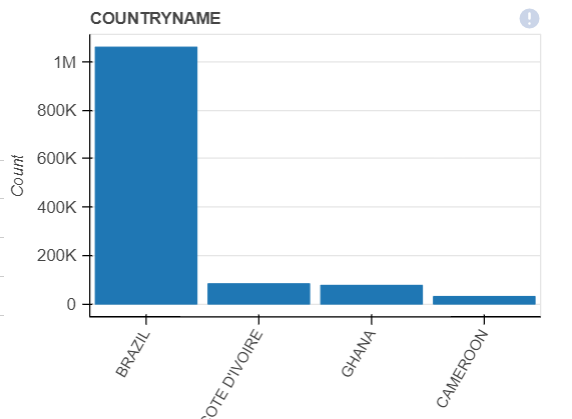

### Jaki jest zakres znaczników czasowych dla każdego z krajów?

In [206]:
dict_time_availability = {country: [(df[df["COUNTRYNAME"] == country]["DATE"].min().date().strftime("%Y-%m-%d"), df[df["COUNTRYNAME"] == country]["DATE"].max().date().strftime("%Y-%m-%d"))] for country in df["COUNTRYNAME"].unique()}
dict_time_availability

{'BRAZIL': [('2000-01-01', '2023-03-17')],
 'CAMEROON': [('2000-01-01', '2023-03-17')],
 'GHANA': [('2000-01-02', '2023-03-17')],
 "COTE D'IVOIRE": [('2000-01-01', '2023-03-17')]}

Pola: DEWP_°C, SLP, STP, VSIB_km, WDSP_km/h, MXSPD_km/h, GUST_km/h, PRCP_mm zawierają puste wartości. Poniżej znajduje się lista uszeregowanych pól pod względem wartości procentowej pustych wartości (od największego do najmniejszego) do całego zbioru danych oraz wykres słupkowy przedstawiający ilość pustych oraz nie-pustych wartości.

* GUST_km/h - 73.85%
* STP - 56.18%
* SLP - 48.99%
* VISIB_km - 26.17%
* PRCP_mm - 13.07%
* MXSPD_km/h - 5.33%
* WDSP_km/h - 3.26%
* DEWP_°C - 1.11%

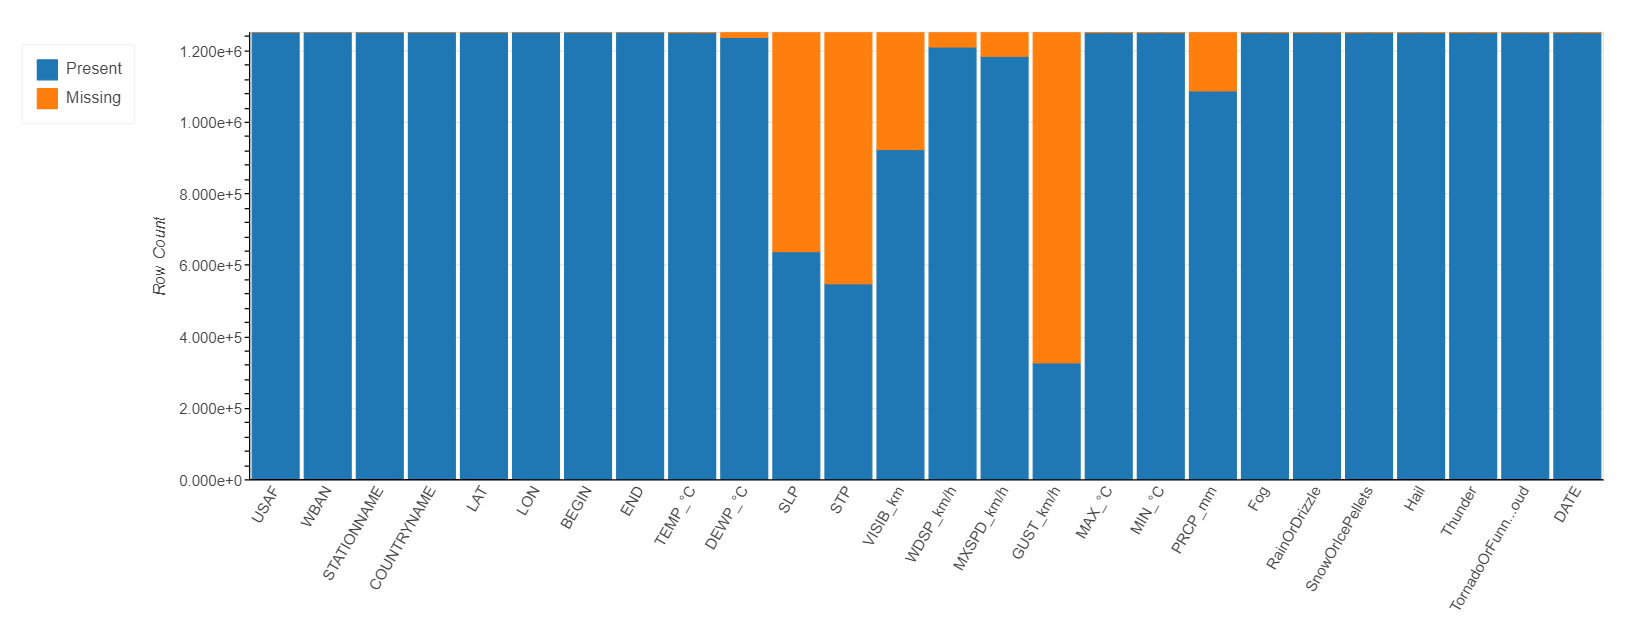

Należy sprawdzić jaka jest dostępność w kontekście znaczników czasu oraz krajów dla poszczególnych pól.

In [152]:
import warnings
warnings.filterwarnings("ignore")

for field in ["GUST_km/h", "STP", "SLP", "VISIB_km", "PRCP_mm", "MXSPD_km/h", "WDSP_km/h", "DEWP_°C"]:
    print("**************************************")
    print(field)
    # fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    # fig.suptitle("Time series for {0} field with null values included.".format(field))
    # plt.subplots_adjust(hspace=0.5)
    # axes_flat = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
    for i, country in enumerate(df[df[field].isna()]["COUNTRYNAME"].unique()):
        print(country)
        print("Ilość pustych wartości dla {0}: {1}".format(field, len(df[df[field].isna()][df["COUNTRYNAME"] == country])))
        print("Procent pustych wartości w stosunku do wszystkich: {0: .3f}%".format(len(df[df[field].isna()][df["COUNTRYNAME"] == country])/len(df[df["COUNTRYNAME"] == country])*100))
    #     df[df["COUNTRYNAME"] == country].plot(x="DATE", y=field, title=country, ax=axes_flat[i])
    # fig.savefig(".\charts\EDA_NOAA\{0}_time_with_nulls.png".format(field.split('_', 1)[0]))

**************************************
GUST_km/h
BRAZIL
Ilość pustych wartości dla GUST_km/h: 734762
Procent pustych wartości w stosunku do wszystkich:  69.304%
CAMEROON
Ilość pustych wartości dla GUST_km/h: 29648
Procent pustych wartości w stosunku do wszystkich:  95.998%
GHANA
Ilość pustych wartości dla GUST_km/h: 76696
Procent pustych wartości w stosunku do wszystkich:  99.852%
COTE D'IVOIRE
Ilość pustych wartości dla GUST_km/h: 82926
Procent pustych wartości w stosunku do wszystkich:  99.290%
**************************************
STP
BRAZIL
Ilość pustych wartości dla STP: 594543
Procent pustych wartości w stosunku do wszystkich:  56.079%
CAMEROON
Ilość pustych wartości dla STP: 14245
Procent pustych wartości w stosunku do wszystkich:  46.124%
GHANA
Ilość pustych wartości dla STP: 76810
Procent pustych wartości w stosunku do wszystkich:  100.000%
COTE D'IVOIRE
Ilość pustych wartości dla STP: 17225
Procent pustych wartości w stosunku do wszystkich:  20.624%
*************************

Pola GUST_km/h oraz STP powinny zostać usunięte, ponieważ dla każdego kraju procent wartości pustych przekracza 20%.

Pole SLP może zostać użyte jedynie dla terytorium Ghany, ponieważ procent pustych wartości wynosi tam około 7%.

Pole VISIB_km nie może zostać użyte dla Brazylii, ponieważ procent pustych wartości wynosi około 31%.

Pole PRCP_mm może zostać użyte dla całego zbioru, ponieważ procent pustych wartości dla każdego kraju wynosi mniej niż 20%.

Pole MXSPD_km/h nie może zostać użyte dla Cote d'ivoire, ponieważ procent pustych wartości dla tego kraju wynosi powyżej 43%.

Pole WDSP_km/h nie może zostać użyte dla Cote d'ivoire, ponieważ procent pustych wartości dla tego kraju wynosi powyżej 29%.

Pole DEWP_°C może zostać użyte dla wszystkich krajów, ponieważ procent pustych wartości dla każdego kraju wynosi mniej niż 20%.

**Ostatecznie** polami, które mogą być zachowane są PRCP_mm oraz DEWP_°C. Brakujące wartości mogą zostać uzupełnione w drodze interpolacji lub z wykorzystaniem prostych modeli uczenia maszynowego.

Wykresy dla poszczególnych pól znajdują się w ścieżce ./charts/EDA_NOAA/...

In [166]:
df = df.drop(columns=["GUST_km/h", "STP", "SLP", "VISIB_km", "MXSPD_km/h", "WDSP_km/h"])

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251410 entries, 8 to 2205582
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USAF                  1251410 non-null  int64         
 1   WBAN                  1251410 non-null  int64         
 2   STATIONNAME           1251410 non-null  object        
 3   COUNTRYNAME           1251410 non-null  object        
 4   LAT                   1251410 non-null  float64       
 5   LON                   1251410 non-null  float64       
 6   BEGIN                 1251410 non-null  datetime64[ns]
 7   END                   1251410 non-null  datetime64[ns]
 8   TEMP_°C               1251410 non-null  float64       
 9   DEWP_°C               1237958 non-null  float64       
 10  MAX_°C                1251410 non-null  float64       
 11  MIN_°C                1251410 non-null  float64       
 12  PRCP_mm               1088194 non-null  fl

### Przegląd pól kategorycznych niebędących metadanymi

In [203]:
for field in ["Fog", "RainOrDrizzle", "SnowOrIcePellets", "Hail", "Thunder", "TornadoOrFunnelCloud"]:
    print("***************************")
    print(field)
    for i, country in enumerate(df["COUNTRYNAME"].unique()):
        print(country)
        print("Percent of False: {0: .3f}% | Percent of True: {1: .3f}%".format(len(df[df["COUNTRYNAME"] == country][df[field] == False])/len(df[df["COUNTRYNAME"] == country])*100, 
                                                                                len(df[df["COUNTRYNAME"] == country][df[field] == True])/len(df[df["COUNTRYNAME"] == country])*100))

***************************
Fog
BRAZIL
Percent of False:  96.582% | Percent of True:  3.418%
CAMEROON
Percent of False:  96.565% | Percent of True:  3.435%
GHANA
Percent of False:  97.976% | Percent of True:  2.024%
COTE D'IVOIRE
Percent of False:  94.191% | Percent of True:  5.809%
***************************
RainOrDrizzle
BRAZIL
Percent of False:  76.433% | Percent of True:  23.567%
CAMEROON
Percent of False:  68.113% | Percent of True:  31.887%
GHANA
Percent of False:  85.258% | Percent of True:  14.742%
COTE D'IVOIRE
Percent of False:  75.384% | Percent of True:  24.616%
***************************
SnowOrIcePellets
BRAZIL
Percent of False:  99.991% | Percent of True:  0.009%
CAMEROON
Percent of False:  99.974% | Percent of True:  0.026%
GHANA
Percent of False:  99.962% | Percent of True:  0.038%
COTE D'IVOIRE
Percent of False:  99.872% | Percent of True:  0.128%
***************************
Hail
BRAZIL
Percent of False:  99.970% | Percent of True:  0.030%
CAMEROON
Percent of False: 

Wartości kategoryczne w badanym zbiorze danych cechują się dużym niezbalansowaniem. Znaczną większość wartości stanowi logiczne False, co mogłoby źle wpłynąć na wiarygodność skuteczności przyszłych modeli. Jedynymi polami, które mogłyby nadawać się do użycia są RainOrDrizzle oraz Thunder (przede wszystkim dla kraju Cameroon), ponieważ dysproporcja w przypadku tych pól wynosi (False:True) od 85:15 do nawet 46:54.

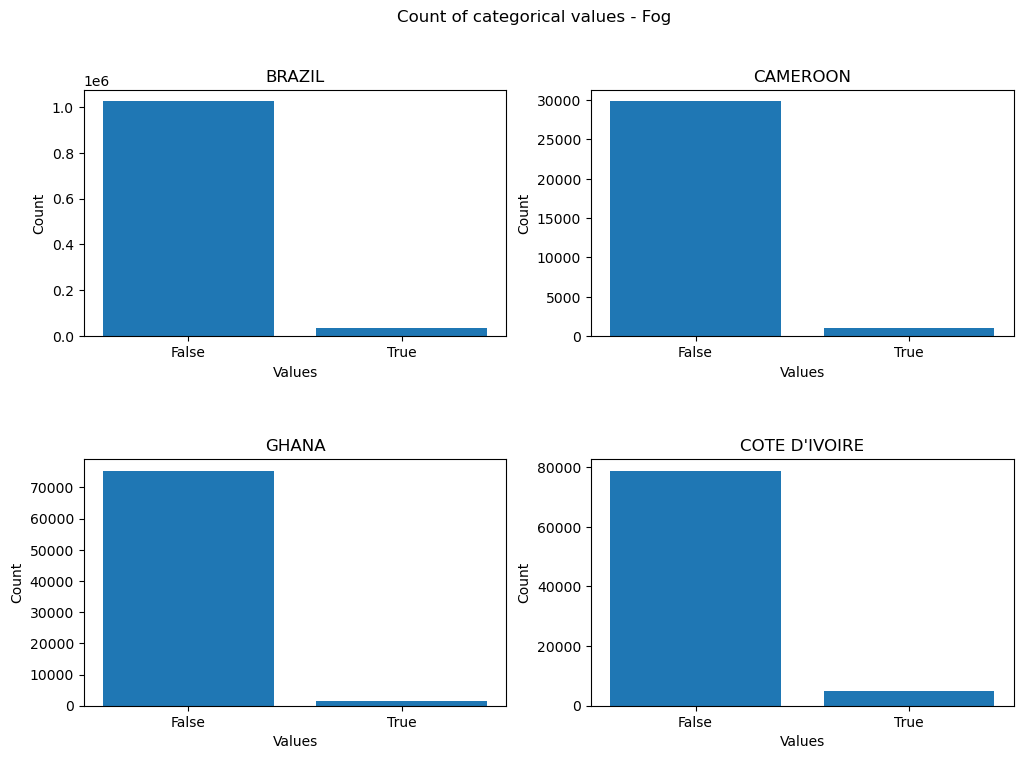

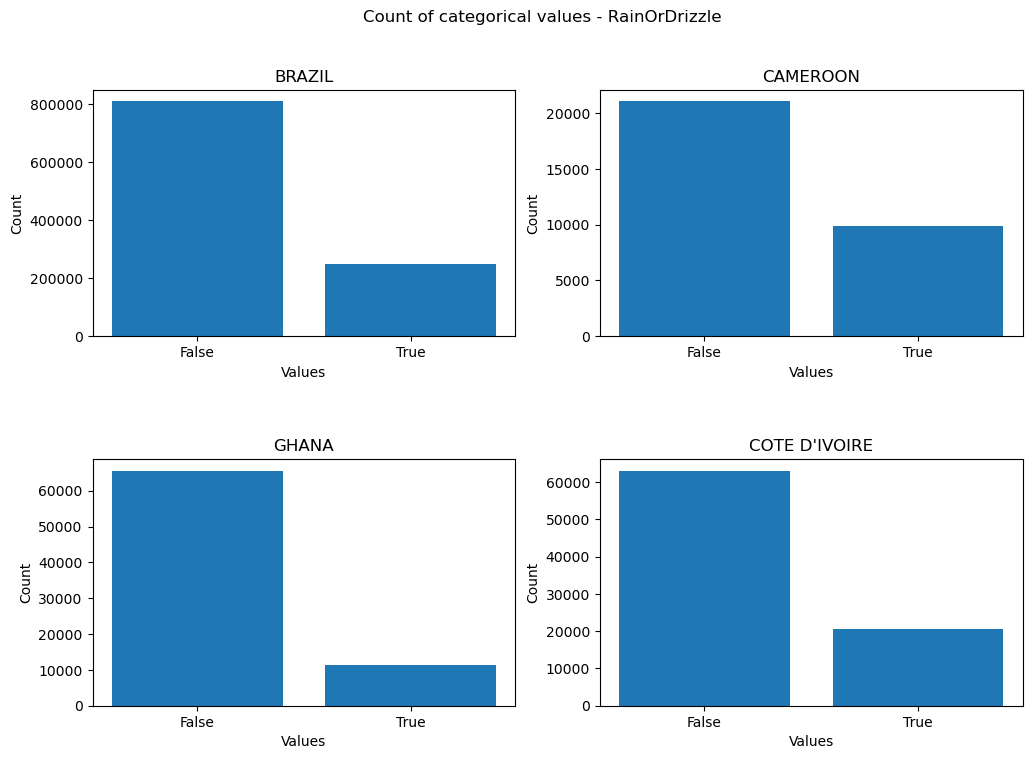

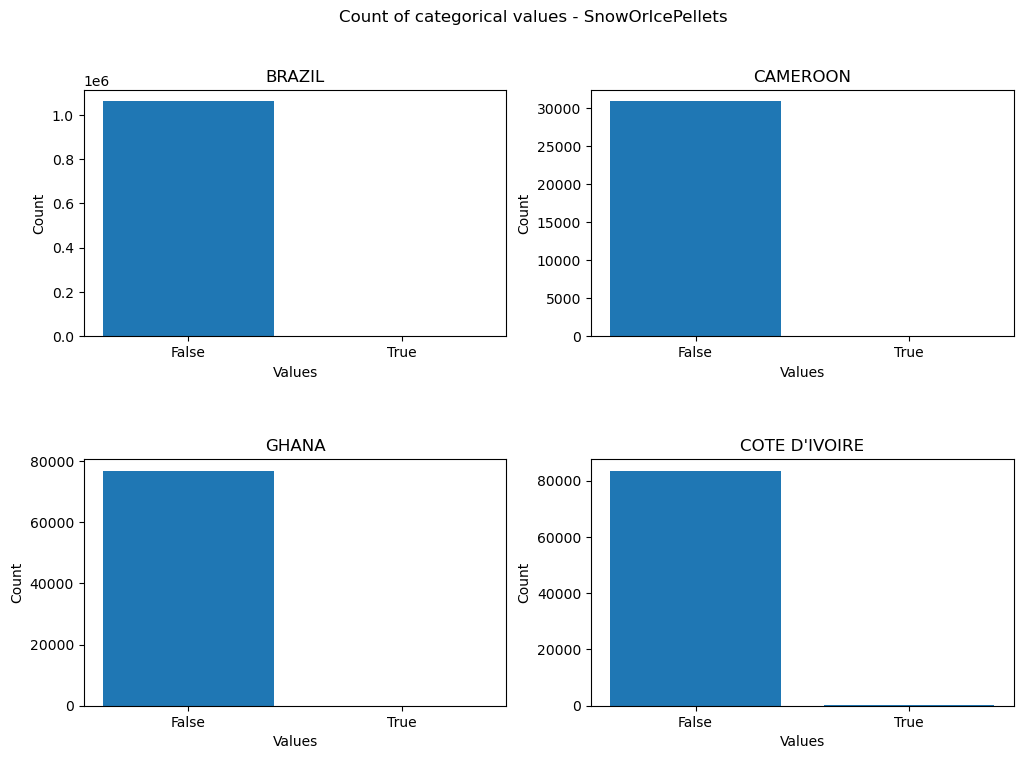

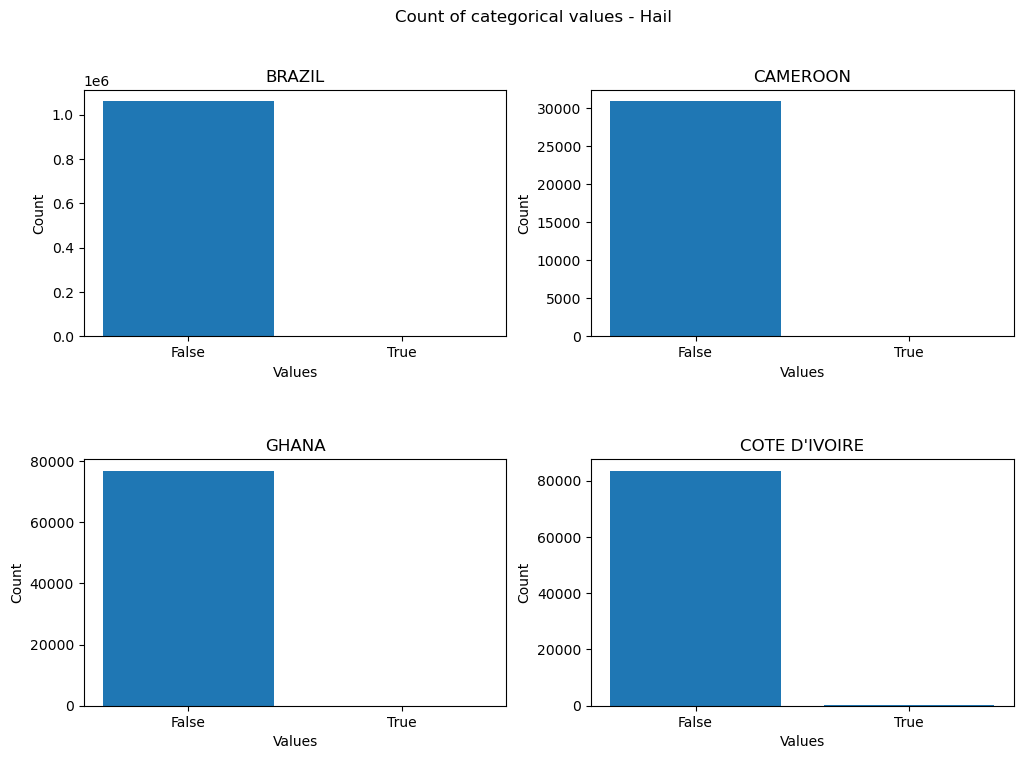

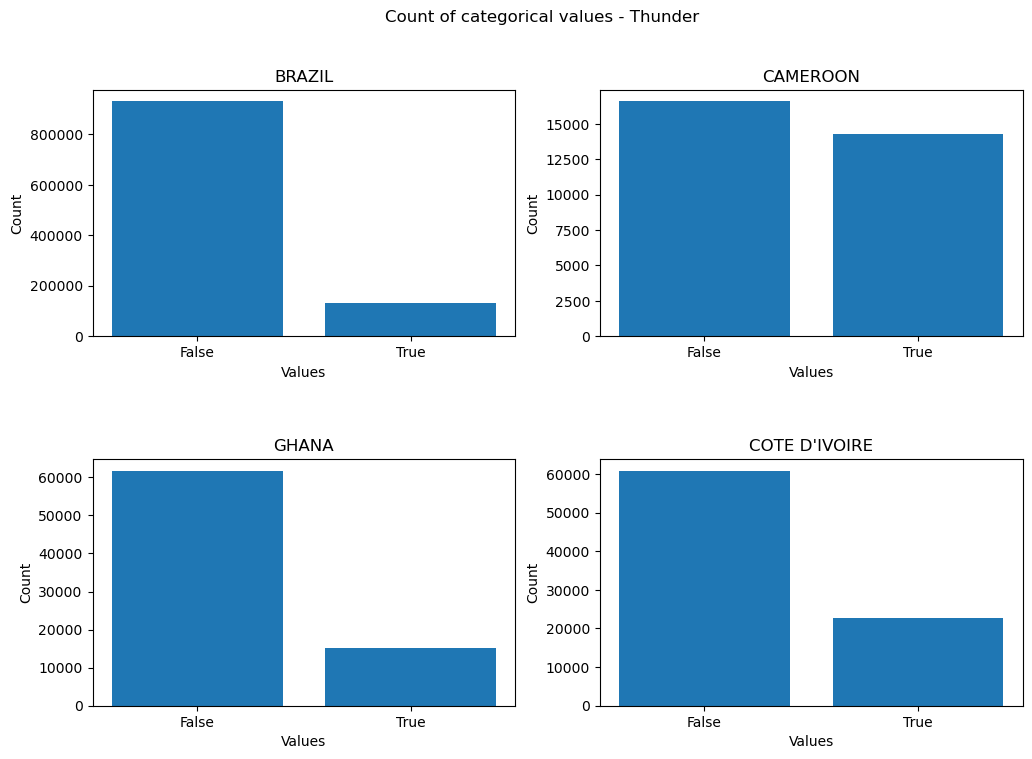

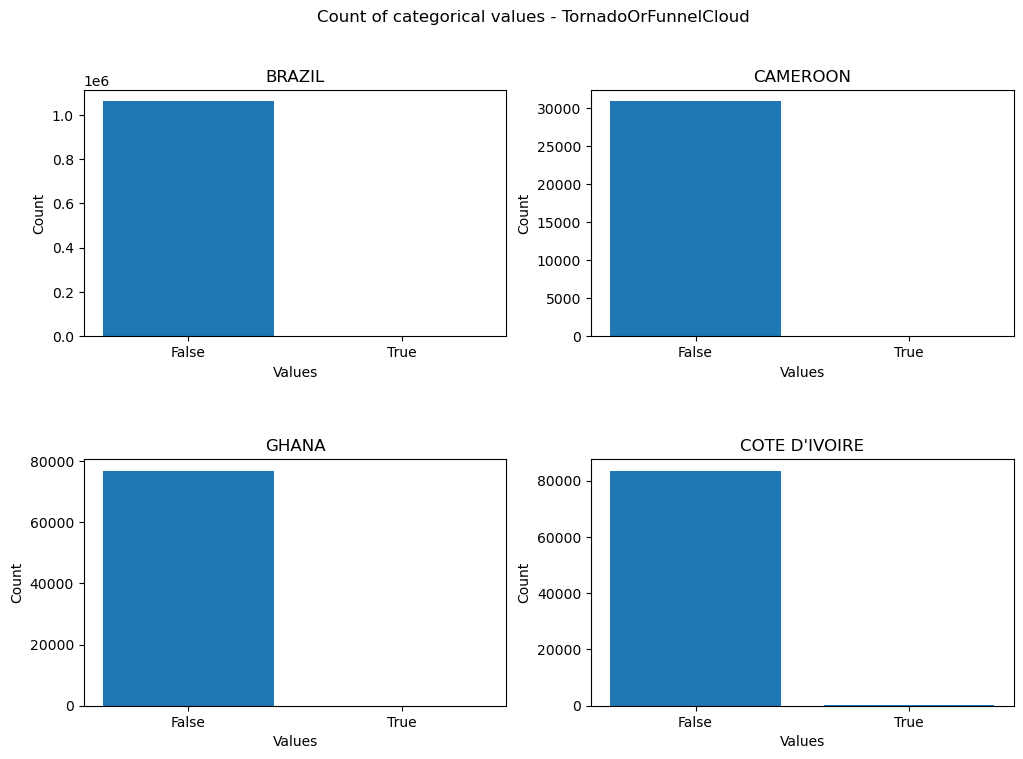

In [202]:

for field in ["Fog", "RainOrDrizzle", "SnowOrIcePellets", "Hail", "Thunder", "TornadoOrFunnelCloud"]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    fig.suptitle("Count of categorical values - {0}".format(field))
    plt.subplots_adjust(hspace=0.5)
    axes_flat = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
    for i, country in enumerate(df["COUNTRYNAME"].unique()):
        axes_flat[i].bar(x=np.arange(len(df[field].unique())), height=[len(df[df["COUNTRYNAME"] == country][df[field] == df[field].unique()[0]]), 
                                            len(df[df["COUNTRYNAME"] == country][df[field] == df[field].unique()[1]])])
        axes_flat[i].set_title(country)
        axes_flat[i].set_xlabel("Values")
        axes_flat[i].set_ylabel("Count")
        axes_flat[i].set_xticks(np.arange(len(df["Fog"].unique())), df["Fog"].unique())
    fig.savefig(".\charts\EDA_NOAA\Categorical\{0}_values_count.png".format(field))

In [207]:
df = df.drop(columns=["Fog", "SnowOrIcePellets", "Hail", "TornadoOrFunnelCloud"])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251410 entries, 8 to 2205582
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   USAF           1251410 non-null  int64         
 1   WBAN           1251410 non-null  int64         
 2   STATIONNAME    1251410 non-null  object        
 3   COUNTRYNAME    1251410 non-null  object        
 4   LAT            1251410 non-null  float64       
 5   LON            1251410 non-null  float64       
 6   BEGIN          1251410 non-null  datetime64[ns]
 7   END            1251410 non-null  datetime64[ns]
 8   TEMP_°C        1251410 non-null  float64       
 9   DEWP_°C        1237958 non-null  float64       
 10  MAX_°C         1251410 non-null  float64       
 11  MIN_°C         1251410 non-null  float64       
 12  PRCP_mm        1088194 non-null  float64       
 13  RainOrDrizzle  1251410 non-null  object        
 14  Thunder        1251410 non-null  o

Co do zrobienia?
* Interpolacja DEWP oraz PRCP
* Sprawdzenie korelacji (podejrzane MAX oraz MIN)
* Transformacja do danych miesięcznych
* Oczyszczenie do postaci danych gotowych dla modeli